In [1]:
import pandas as pd
import nltk
import numpy as np
from nltk.corpus import stopwords
import re
from nltk.stem import SnowballStemmer

In [2]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin',names=['target','id','date','flag','user','text'])

In [3]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.drop(columns=['id','date','user','flag'],inplace=True)

In [5]:
df = df[['text','target']]

In [6]:
df.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [7]:
df.isna().sum()

text      0
target    0
dtype: int64

<AxesSubplot:>

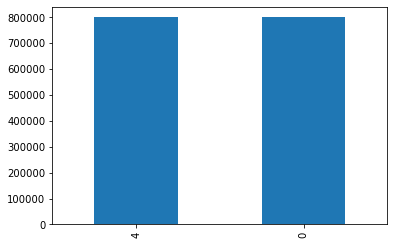

In [8]:
df.target.value_counts().plot(kind='bar')

In [9]:
df['target'] = df['target'].replace(4,1)

In [10]:
df.shape

(1600000, 2)

In [11]:
stemmer = nltk.SnowballStemmer("english")
STOPWORDS = stopwords.words('english')
STOPWORDS.remove('not')

def clean_text(text):
    
    text = str(text).lower()                                           # converting to lower case
    text = re.sub(r'@\S+|http\|www.\S+|\n','',text)                  # removing mentions and links
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)                        # removing special characters
 
    
    text = [stemmer.stem(word) for word in text.split(' ')]                    # stem words 
    text = " ".join([word for word in text if word not in STOPWORDS])          # remove stopwords
    text = text.strip()
     
    return text


df['text'] = df['text'].apply(clean_text)

In [12]:
df.head()

,text,target
0,httptwitpiccom2y1zl awww bummer shoulda got ...,0
1,upset cant updat facebook text might cri resul...,0
2,dive mani time ball manag save 50 rest go bound,0
3,whole bodi feel itchi like fire,0
4,not behav im mad whi becaus cant see,0


In [13]:
# import wordcloud
# from wordcloud import WordCloud
# wc = WordCloud(width=800, height=600, random_state=42,max_font_size=100).generate(positive)

# import matplotlib.pyplot as plt
# plt.figure(figsize = (15,10))
# plt.imshow(wc, interpolation ='bilinear')
# plt.axis('off')
# plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(ngram_range=(1,2)), MultinomialNB())

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df['text'],df['target'],test_size =0.2 , random_state = 42)

In [16]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB())])

In [17]:
predicted = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted)

0.785278125

In [33]:
tweet = ''' Government of India has decided to cancel the Class XII CBSE Board Exams. 
After extensive consultations, we have taken a decision that is student-friendly, 
one that safeguards the health as well as future of our youth.  '''
tweet = clean_text(tweet)

In [34]:
y = model.predict([tweet])

if(y[0]==0):
    print('Ah! This tweet has negative vibes!')
else:
    print('YAY!! This tweet spreads positivity!')

    

YAY!! This tweet spreads positivity!


In [35]:
import pickle

In [36]:
model.score(X_test,y_test)

0.785278125